<a href="https://colab.research.google.com/github/Morganblabla/Estadistica/blob/main/DefProblemario_Unidad_5_Parte_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

#23150264
Paulina Morgan Jiménez

Estadistica Inferencial II
TEMA V



##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


In [148]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

data = '''
metodo,replica,respuesta
M1,R1,72
M1,R2,65
M1,R3,67
M1,R4,75
M1,R5,62
M1,R6,73
M2,R1,55
M2,R2,59
M2,R3,68
M2,R4,70
M2,R5,53
M2,R6,50
M3,R1,64
M3,R2,74
M3,R3,61
M3,R4,58
M3,R5,51
M3,R6,69
'''


df = pd.read_csv(StringIO(data))
df

,metodo,replica,respuesta
0,M1,R1,72
1,M1,R2,65
2,M1,R3,67
3,M1,R4,75
4,M1,R5,62
5,M1,R6,73
6,M2,R1,55
7,M2,R2,59
8,M2,R3,68
9,M2,R4,70


In [149]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'replica'    # La variable que no me interesa comparar
interes = 'metodo'      # La variable que me interesa comparar
respuesta = 'respuesta'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                sum_sq    df         F    PR(>F)
C(metodo)   296.333333   2.0  2.880752  0.102804
C(replica)  281.333333   5.0  1.093973  0.420718
Residual    514.333333  10.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


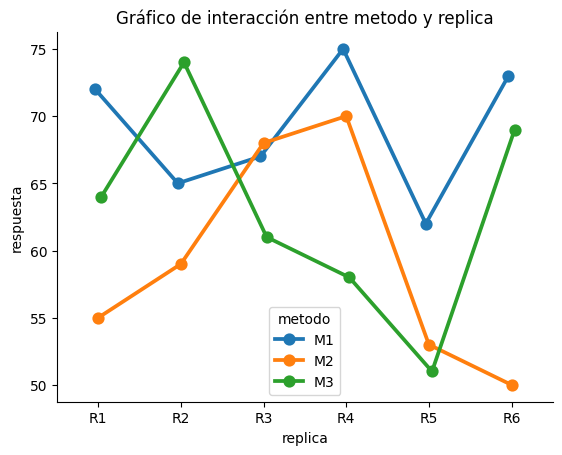

In [150]:
#PAULINA MORGAN JIMÉNEZ
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    M1     M2  -9.8333 0.0808 -20.7555  1.0889  False
    M1     M3  -6.1667 0.3341 -17.0889  4.7555  False
    M2     M3   3.6667 0.6655  -7.2555 14.5889  False
-----------------------------------------------------


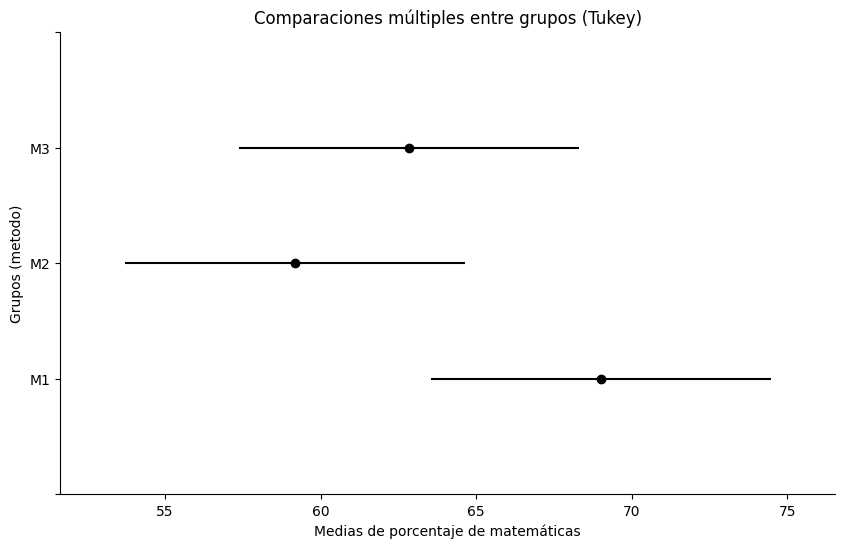

In [151]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['respuesta'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (metodo)", xlabel="Medias de porcentaje de matemáticas")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

No hay diferencia significativa entre las marcas. Básicamente cualquiera esta bien, aunque de preferencia compren el 1.

##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


In [152]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

data = '''
silo,replica,respuesta
A,Lunes,4.0
A,Martes,4.0
A,Miercoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miercoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miercoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miercoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miercoles,3.5
E,Jueves,2.0
E,Viernes,4.0

'''


df = pd.read_csv(StringIO(data))
df

,silo,replica,respuesta
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miercoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miercoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


In [153]:
#PAULINA MORGAN JIMÉNEZ
df = pd.read_csv(StringIO(data))

nivel_de_significancia = 0.05

bloques = 'replica'    # La variable que no me interesa comparar
interes = 'silo'      # La variable que me interesa comparar
respuesta = 'respuesta'     # La medición que me permite hacer la comparación

# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
            sum_sq    df         F    PR(>F)
C(silo)       4.46   4.0  0.690402  0.609212
C(replica)    9.76   4.0  1.510836  0.246022
Residual     25.84  16.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
     A      B      0.9 0.8211 -1.625 3.425  False
     A      C      0.1    1.0 -2.425 2.625  False
     A      D      1.0 0.7596 -1.525 3.525  False
     A      E      0.2 0.9992 -2.325 2.725  False
     B      C     -0.8 0.8745 -3.325 1.725  False
     B      D      0.1    1.0 -2.425 2.625  False
     B      E     -0.7 0.9183 -3.225 1.825  False
     C      D      0.9 0.8211 -1.625 3.425  False
     C      E      0.1    1.0 -2.425 2.625  False
     D      E     -0.8 0.8745 -3.325 1.725  False
-------------------------------------------------


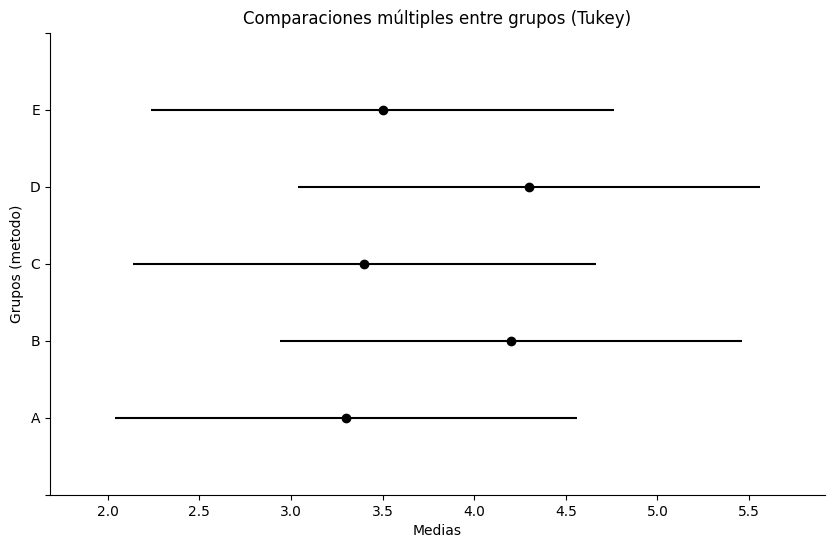

In [154]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['respuesta'], groups=df['silo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (metodo)", xlabel="Medias")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

No hay diferencia entre silos. Usa el que quieras.

## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



In [155]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

data = '''
detergente,lavadora,respuesta
A,Lavadora 1,45
A,Lavadora 2,43
A,Lavadora 3,51
B,Lavadora 1,47
B,Lavadora 2,44
B,Lavadora 3,52
C,Lavadora 1,50
C,Lavadora 2,49
C,Lavadora 3,5
D,Lavadora 1,42
D,Lavadora 2,37
D,Lavadora 3,49
'''


df = pd.read_csv(StringIO(data))
df

,detergente,lavadora,respuesta
0,A,Lavadora 1,45
1,A,Lavadora 2,43
2,A,Lavadora 3,51
3,B,Lavadora 1,47
4,B,Lavadora 2,44
5,B,Lavadora 3,52
6,C,Lavadora 1,50
7,C,Lavadora 2,49
8,C,Lavadora 3,5
9,D,Lavadora 1,42


Hipótesis: Se busca ver si hay diferencia significativa en el rendimiento de 4 detergentes.

In [156]:
#PAULINA MORGAN JIMÉNEZ
df = pd.read_csv(StringIO(data))

nivel_de_significancia = 0.05

bloques = 'lavadora'    # La variable que no me interesa comparar
interes = 'detergente'      # La variable que me interesa comparar
respuesta = 'respuesta'     # La medición que me permite hacer la comparación

# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")

Resultados del ANOVA:
                    sum_sq   df         F    PR(>F)
C(detergente)   307.000000  3.0  0.448666  0.727372
C(lavadora)      92.166667  2.0  0.202046  0.822396
Residual       1368.500000  6.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333 0.9993 -33.9975 36.6642  False
     A      C -11.6667 0.7228 -46.9975 23.6642  False
     A      D  -3.6667 0.9864 -38.9975 31.6642  False
     B      C    -13.0 0.6558 -48.3308 22.3308  False
     B      D     -5.0 0.9671 -40.3308 30.3308  False
     C      D      8.0 0.8844 -27.3308 43.3308  False
-----------------------------------------------------


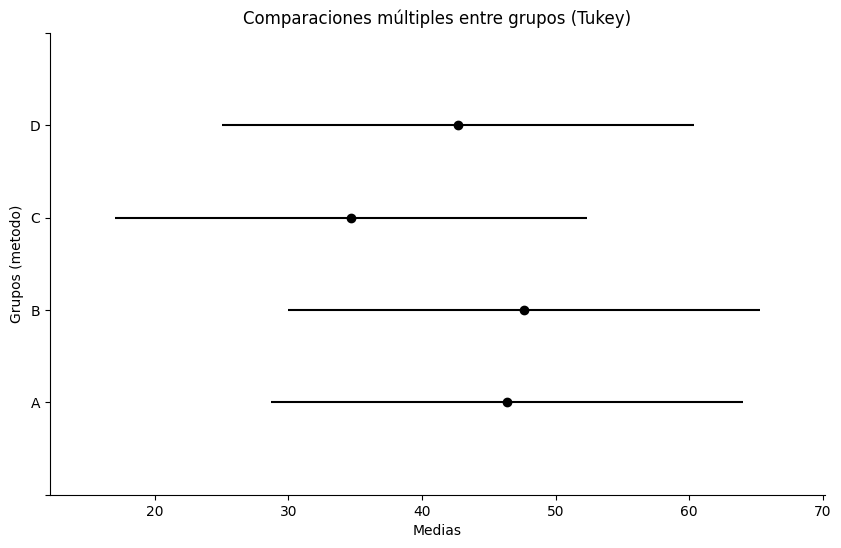

In [157]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['respuesta'], groups=df['detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (metodo)", xlabel="Medias")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

No hay diferencia significativa. Usa el que quieras.

## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

In [158]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

data = '''
detergente,respuesta
A,45
A,43
A,51
B,47
B,44
B,52
C,50
C,49
C,57
D,42
D,37
'''


df = pd.read_csv(StringIO(data))
df

,detergente,respuesta
0,A,45
1,A,43
2,A,51
3,B,47
4,B,44
5,B,52
6,C,50
7,C,49
8,C,57
9,D,42


In [159]:
#PAULINA MORGAN JIMÉNEZ
df = pd.read_csv(StringIO(data))

nivel_de_significancia = 0.05

interes = 'detergente'      # La variable que me interesa comparar
respuesta = 'respuesta'     # La medición que me permite hacer la comparación

# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")


Resultados del ANOVA:
                   sum_sq   df         F    PR(>F)
C(detergente)  190.166667  3.0  3.765677  0.067507
Residual       117.833333  7.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B   1.3333  0.977  -9.7556 12.4222  False
     A      C   5.6667 0.3939  -5.4222 16.7556  False
     A      D  -6.8333 0.3378 -19.2311  5.5644  False
     B      C   4.3333 0.5944  -6.7556 15.4222  False
     B      D  -8.1667  0.218 -20.5644  4.2311  False
     C      D    -12.5 0.0483 -24.8978 -0.1022   True
-----------------------------------------------------


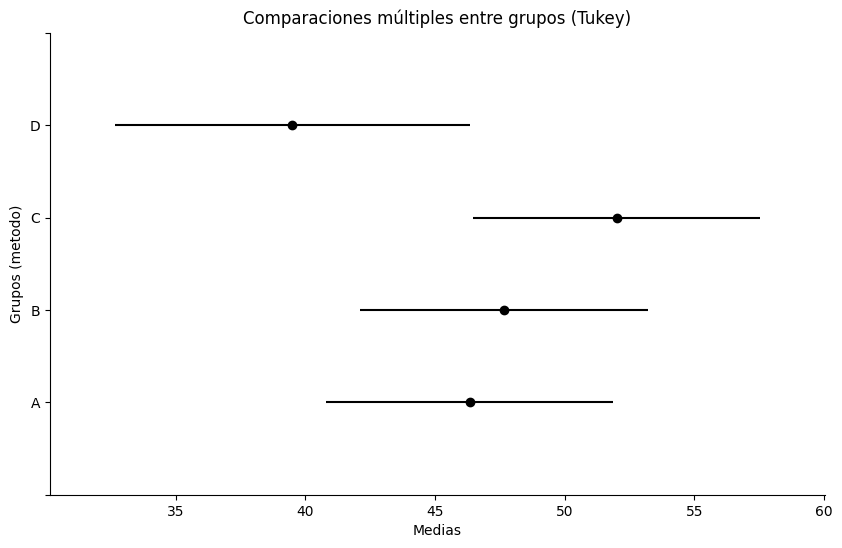

In [160]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['respuesta'], groups=df['detergente'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (metodo)", xlabel="Medias")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

Aquí podemos ver que sin tomar en cuenta las lavadoras los resultados si varian, ya que no existe una diferencia MUY significativa, pero se ve que el detergente D tiene peores resultados, mientras que C tiene mejores.

## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


In [161]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

data = '''
operador,equipo,respuesta
1,Equipo 1,1.328
1,Equipo 1,0.985
1,Equipo 1,1.316
1,Equipo 1,1.553
1,Equipo 1,1.310
1,Equipo 2,1.273
1,Equipo 2,0.985
1,Equipo 2,1.134
1,Equipo 2,1.412
1,Equipo 2,0.917
2,Equipo 1,1.269
2,Equipo 1,1.268
2,Equipo 1,1.091
2,Equipo 1,1.1
'''


df = pd.read_csv(StringIO(data))
df

,operador,equipo,respuesta
0,1,Equipo 1,1.328
1,1,Equipo 1,0.985
2,1,Equipo 1,1.316
3,1,Equipo 1,1.553
4,1,Equipo 1,1.310
5,1,Equipo 2,1.273
6,1,Equipo 2,0.985
7,1,Equipo 2,1.134
8,1,Equipo 2,1.412
9,1,Equipo 2,0.917


Hipótesis: Se busca determinar que equipo mide mejor un ángulo en unidades de radianes.

In [162]:
#PAULINA MORGAN JIMÉNEZ
df = pd.read_csv(StringIO(data))

nivel_de_significancia = 0.05

bloques = 'operador'    # La variable que no me interesa comparar
interes = 'equipo'      # La variable que me interesa comparar
respuesta = 'respuesta'     # La medición que me permite hacer la comparación

# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los operadores.")
else:
    print("Conclusión: No hay diferencias significativas entre los operadores.")


Resultados del ANOVA:
               sum_sq    df         F    PR(>F)
C(equipo)    0.059444   1.0  1.817832  0.204678
C(operador)  0.030109   1.0  0.920743  0.357897
Residual     0.359706  11.0       NaN       NaN

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.
Conclusión: No hay diferencias significativas entre los operadores.


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
Equipo 1 Equipo 2  -0.1025 0.3282 -0.3215 0.1166  False
-------------------------------------------------------


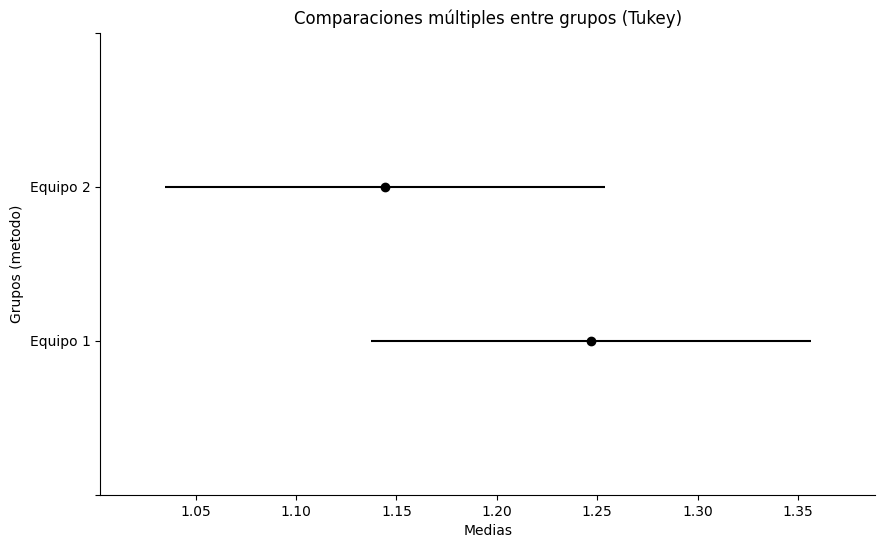

In [163]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['respuesta'], groups=df['equipo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (metodo)", xlabel="Medias")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

No hay diferencia significativa entre los equipos. Aunque si quieres escoger una, elige el equipo 1.

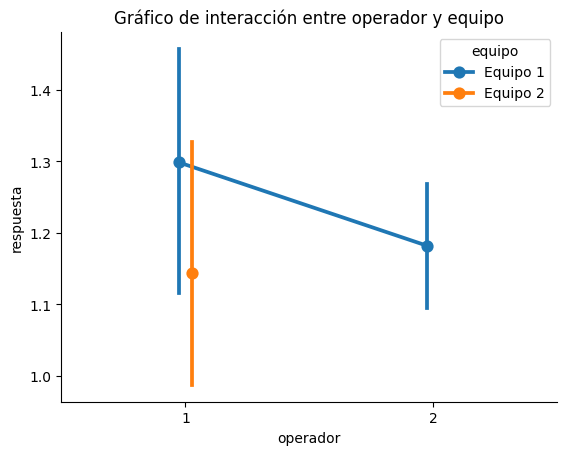

In [164]:
#PAULINA MORGAN JIMÉNEZ
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {bloques} y {interes}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()


Test de Shapiro-Wilk para normalidad:
Estadístico = 0.9737, p-valor = 0.9224
→ No se rechaza la normalidad (los residuos parecen normales).


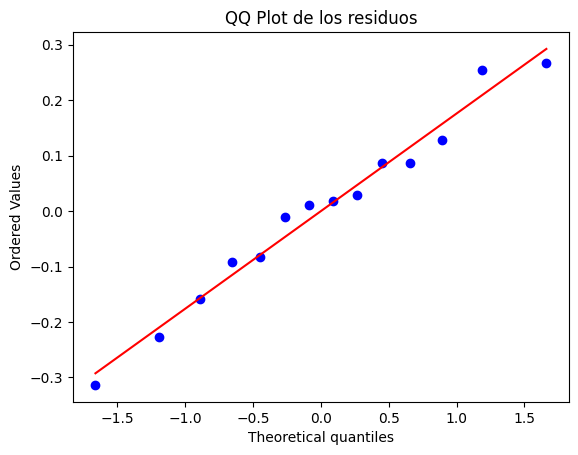

In [165]:
#PAULINA MORGAN JIMÉNEZ
# 1. Supuesto de normalidad de los residuos
from scipy.stats import shapiro, probplot

# Obtener residuos del modelo
residuos = modelo.resid

# Test de Shapiro-Wilk
stat, p_value = shapiro(residuos)
print(f"\nTest de Shapiro-Wilk para normalidad:")
print(f"Estadístico = {stat:.4f}, p-valor = {p_value:.4f}")
if p_value > nivel_de_significancia:
    print("→ No se rechaza la normalidad (los residuos parecen normales).")
else:
    print("→ Se rechaza la normalidad (los residuos no parecen normales).")

# QQ plot
plt.figure()
probplot(residuos, dist="norm", plot=plt)
plt.title("QQ Plot de los residuos")
plt.show()



Test de Breusch-Pagan para homocedasticidad:
Estadístico = 1.9155, p-valor = 0.3837
→ No se rechaza la homocedasticidad (varianzas homogéneas).


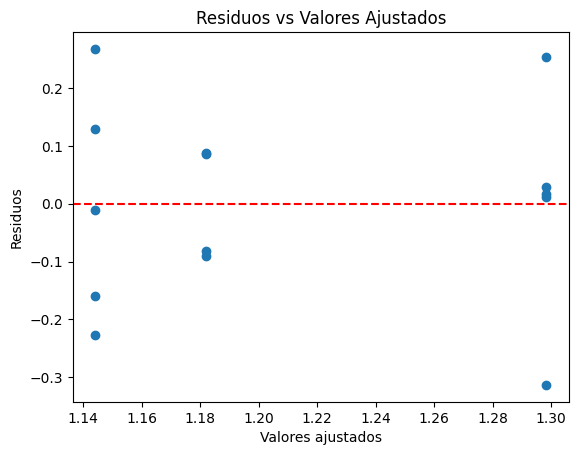

In [166]:
#PAULINA MORGAN JIMÉNEZ
#2. Supuesto de igualdad de varianza (homocedasticidad)
from statsmodels.stats.diagnostic import het_breuschpagan

# Prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuos, modelo.model.exog)
bp_stat, bp_pvalue = bp_test[0], bp_test[1]

print(f"\nTest de Breusch-Pagan para homocedasticidad:")
print(f"Estadístico = {bp_stat:.4f}, p-valor = {bp_pvalue:.4f}")
if bp_pvalue > nivel_de_significancia:
    print("→ No se rechaza la homocedasticidad (varianzas homogéneas).")
else:
    print("→ Se rechaza la homocedasticidad (posible heterocedasticidad).")

# Gráfico de residuos vs valores ajustados
ajustados = modelo.fittedvalues
plt.figure()
plt.scatter(ajustados, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs Valores Ajustados")
plt.show()

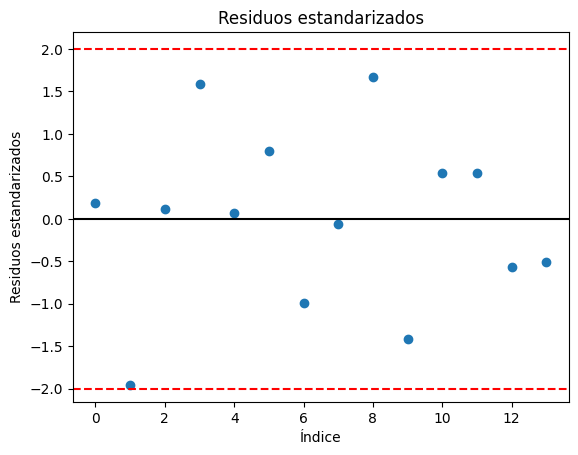


Puntos potencialmente aberrantes (residuos estandarizados > |2|):
Empty DataFrame
Columns: [operador, equipo, respuesta]
Index: []


In [167]:
#PAULINA MORGAN JIMÉNEZ
# 3. Puntos aberrantes (outliers)
import numpy as np

# Residuos estandarizados
residuos_est = residuos / np.std(residuos)

# Gráfico de residuos estandarizados
plt.figure()
plt.scatter(range(len(residuos_est)), residuos_est)
plt.axhline(0, color='black', linestyle='-')
plt.axhline(2, color='red', linestyle='--')
plt.axhline(-2, color='red', linestyle='--')
plt.title("Residuos estandarizados")
plt.xlabel("Índice")
plt.ylabel("Residuos estandarizados")
plt.show()

# Mostrar los puntos fuera del rango esperado
outliers = df[np.abs(residuos_est) > 2]
print("\nPuntos potencialmente aberrantes (residuos estandarizados > |2|):")
print(outliers)

## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


In [168]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO

data_rtd = '''
silo,dia,respuesta
A,1,2.6
A,2,2.8
A,3,5.0
A,4,0.0
A,5,2.4
B,1,6.4
B,2,6.4
B,3,2.3
B,4,4.2
B,5,4.0
C,1,3.3
C,2,1.4
C,3,1.8
C,4,-1.9
C,5,-7.6
D,1,3.1
D,2,5.0
D,3,6.6
D,4,2.7
D,5,4.0
E,1,0.0
E,2,3.5
E,3,2.0
E,4,-4.0
E,5,-6.3
'''

df = pd.read_csv(StringIO(data_rtd))
df

,silo,dia,respuesta
0,A,1,2.6
1,A,2,2.8
2,A,3,5.0
3,A,4,0.0
4,A,5,2.4
5,B,1,6.4
6,B,2,6.4
7,B,3,2.3
8,B,4,4.2
9,B,5,4.0


In [169]:
#PAULINA MORGAN JIMÉNEZ
# Mostrar resumen estadístico
print(df.describe())

# Mostrar los datos para inspección visual
print(df)

# Observación cualitativa (puede ser en comentario o print)
print("""
Conjetura:
- Las mediciones con termómetro Rtd muestran valores negativos en varios casos,
  lo cual es poco probable para temperatura de almacenamiento de leche.
- Hay mucha variabilidad entre días y silos, más que la esperada.
- Estos indicios sugieren que las mediciones Rtd podrían no ser confiables,
  posiblemente por falta de calibración o errores en los sensores.
""")


             dia  respuesta
count  25.000000  25.000000
mean    3.000000   1.988000
std     1.443376   3.641579
min     1.000000  -7.600000
25%     2.000000   1.400000
50%     3.000000   2.700000
75%     4.000000   4.000000
max     5.000000   6.600000
   silo  dia  respuesta
0     A    1        2.6
1     A    2        2.8
2     A    3        5.0
3     A    4        0.0
4     A    5        2.4
5     B    1        6.4
6     B    2        6.4
7     B    3        2.3
8     B    4        4.2
9     B    5        4.0
10    C    1        3.3
11    C    2        1.4
12    C    3        1.8
13    C    4       -1.9
14    C    5       -7.6
15    D    1        3.1
16    D    2        5.0
17    D    3        6.6
18    D    4        2.7
19    D    5        4.0
20    E    1        0.0
21    E    2        3.5
22    E    3        2.0
23    E    4       -4.0
24    E    5       -6.3

Conjetura:
- Las mediciones con termómetro Rtd muestran valores negativos en varios casos, 
  lo cual es poco probable para

In [170]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Modelo estadístico con silo como tratamiento y día como bloque
modelo = ols('respuesta ~ C(silo) + C(dia)', data=df).fit()

# ANOVA
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

print("Resultados del ANOVA para Rtd:")
print(tabla_anova)

# Nivel de significancia
alpha = 0.05

# Conclusión sobre el efecto del silo (tratamientos)
if tabla_anova.loc['C(silo)', 'PR(>F)'] < alpha:
    print("\nConclusión: Hay diferencias significativas entre silos según mediciones Rtd.")
else:
    print("\nConclusión: No hay diferencias significativas entre silos según mediciones Rtd.")


Resultados del ANOVA para Rtd:
            sum_sq    df         F    PR(>F)
C(silo)   140.5424   4.0  6.189550  0.003304
C(dia)     86.8984   4.0  3.827044  0.022852
Residual   90.8256  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre silos según mediciones Rtd.


In [171]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_mer = '''
silo,dia,respuesta
A,1,4.0
A,2,4.0
A,3,5.0
A,4,0.5
A,5,3.0
B,1,5.0
B,2,6.0
B,3,2.0
B,4,4.0
B,5,4.0
C,1,4.5
C,2,4.0
C,3,3.5
C,4,2.0
C,5,3.0
D,1,2.5
D,2,4.0
D,3,6.5
D,4,4.5
D,5,4.0
E,1,4.0
E,2,4.0
E,3,0.6
E,4,-4.0
E,5,-4.0
'''

df_mer = pd.read_csv(StringIO(data_mer))

# Modelo estadístico con silo como tratamiento y día como bloque
modelo_mer = ols('respuesta ~ C(silo) + C(dia)', data=df_mer).fit()

# ANOVA
tabla_anova_mer = sm.stats.anova_lm(modelo_mer, typ=2)

print("Resultados del ANOVA para Mer:")
print(tabla_anova_mer)

# Nivel de significancia
alpha = 0.05

# Conclusión sobre el efecto del silo (tratamientos)
if tabla_anova_mer.loc['C(silo)', 'PR(>F)'] < alpha:
    print("\nConclusión: Hay diferencias significativas entre silos según mediciones Mer.")
else:
    print("\nConclusión: No hay diferencias significativas entre silos según mediciones Mer.")


Resultados del ANOVA para Mer:
           sum_sq    df         F    PR(>F)
C(silo)   58.2696   4.0  3.697403  0.025752
C(dia)    33.8496   4.0  2.147872  0.121867
Residual  63.0384  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre silos según mediciones Mer.


Comparación de conclusiones entre los modelos Rtd y Mer:

- En el análisis con las mediciones Rtd (inciso b), se observó que hay diferencias significativas entre silos según mediciones Rtd.
- En el análisis con las mediciones Mer (inciso c), se encontró que hay diferencias significativas entre silos según mediciones Mer.

Comentarios:

A pesar de la mayor variabilidad en Rtd, los patrones entre silos se mantienen similares.
Además, las mediciones Rtd mostraron valores negativos y variabilidad elevada, lo que refuerza la sospecha de que no son confiables.
Por lo tanto, se recomienda revisar la calibración o funcionamiento de los termómetros Rtd antes de confiar en sus datos para toma de decisiones.

In [172]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Datos Mer
data_mer = '''
silo,dia,respuesta
A,1,4.0
A,2,4.0
A,3,5.0
A,4,0.5
A,5,3.0
B,1,5.0
B,2,6.0
B,3,2.0
B,4,4.0
B,5,4.0
C,1,4.5
C,2,4.0
C,3,3.5
C,4,2.0
C,5,3.0
D,1,2.5
D,2,4.0
D,3,6.5
D,4,4.5
D,5,4.0
E,1,4.0
E,2,4.0
E,3,0.6
E,4,-4.0
E,5,-4.0
'''

# Datos Rtd
data_rtd = '''
silo,dia,respuesta
A,1,2.6
A,2,2.8
A,3,5.0
A,4,0.0
A,5,2.4
B,1,6.4
B,2,6.4
B,3,2.3
B,4,4.2
B,5,4.0
C,1,3.3
C,2,1.4
C,3,1.8
C,4,-1.9
C,5,-7.6
D,1,3.1
D,2,5.0
D,3,6.6
D,4,2.7
D,5,4.0
E,1,0.0
E,2,3.5
E,3,2.0
E,4,-4.0
E,5,-6.3
'''

df_mer = pd.read_csv(StringIO(data_mer))
df_rtd = pd.read_csv(StringIO(data_rtd))

# Unir ambos DataFrames por silo y día para calcular la diferencia
df_diff = pd.merge(df_mer, df_rtd, on=['silo','dia'], suffixes=('_mer', '_rtd'))

# Calcular la diferencia Mer - Rtd
df_diff['respuesta'] = df_diff['respuesta_mer'] - df_diff['respuesta_rtd']

# Modelo estadístico con silo como tratamiento y día como bloque usando la diferencia
modelo_diff = ols('respuesta ~ C(silo) + C(dia)', data=df_diff).fit()

# ANOVA
tabla_anova_diff = sm.stats.anova_lm(modelo_diff, typ=2)

print("Resultados del ANOVA para la diferencia (Mer - Rtd):")
print(tabla_anova_diff)

# Nivel de significancia
alpha = 0.05

# Conclusión sobre el efecto del silo (tratamientos)
if tabla_anova_diff.loc['C(silo)', 'PR(>F)'] < alpha:
    print("\nConclusión: Hay diferencias significativas entre silos en la diferencia de mediciones.")
else:
    print("\nConclusión: No hay diferencias significativas entre silos en la diferencia de mediciones.")


Resultados del ANOVA para la diferencia (Mer - Rtd):
           sum_sq    df         F    PR(>F)
C(silo)   60.6856   4.0  3.866655  0.022039
C(dia)    20.6216   4.0  1.313930  0.306967
Residual  62.7784  16.0       NaN       NaN

Conclusión: Hay diferencias significativas entre silos en la diferencia de mediciones.


## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


a) ¿Cómo se aleatorizó el experimento?
Se utilizó un diseño en cuadro latino 5x5, donde los tratamientos (catalizadores A-E) se asignaron de forma que cada tratamiento aparece una vez por fila (lote) y una vez por columna (día). Así, se controla el efecto del lote y del día como factores de bloqueo, minimizando la variabilidad causada por ellos.

b) Ecuación del modelo y hipótesis
Modelo:
Yijk=μ+τi+βj+γk+εijk
Hipótesis para tratamientos:
H0:τ1=τ2=⋯=τ5 (no hay efecto de tratamiento)
Ha: Al menos un τi es diferente



In [173]:
#PAULINA MORGAN JIMÉNEZ
#c) ¿Existen diferencias entre tratamientos? ¿Cuáles son diferentes?
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = '''
lote,dia,tratamiento,tiempo
1,1,A,8
1,2,B,7
1,3,D,1
1,4,C,7
1,5,E,3
2,1,C,11
2,2,E,2
2,3,A,7
2,4,D,3
2,5,B,8
3,1,B,4
3,2,A,9
3,3,C,10
3,4,E,1
3,5,D,5
4,1,D,6
4,2,C,8
4,3,E,6
4,4,B,6
4,5,A,10
5,1,E,4
5,2,D,2
5,3,B,3
5,4,A,8
5,5,C,8
'''

df = pd.read_csv(StringIO(data))

modelo = ols('tiempo ~ C(tratamiento) + C(lote) + C(dia)', data=df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)
print(anova)

# Prueba post-hoc Tukey para tratamientos
tukey = pairwise_tukeyhsd(df['tiempo'], df['tratamiento'])
print(tukey)


                sum_sq    df          F    PR(>F)
C(tratamiento)  141.44   4.0  11.309168  0.000488
C(lote)          15.44   4.0   1.234542  0.347618
C(dia)           12.24   4.0   0.978678  0.455014
Residual         37.52  12.0        NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B     -2.8 0.1423 -6.2171  0.6171  False
     A      C      0.4 0.9965 -3.0171  3.8171  False
     A      D     -5.0 0.0024 -8.4171 -1.5829   True
     A      E     -5.2 0.0016 -8.6171 -1.7829   True
     B      C      3.2 0.0733 -0.2171  6.6171  False
     B      D     -2.2 0.3361 -5.6171  1.2171  False
     B      E     -2.4 0.2578 -5.8171  1.0171  False
     C      D     -5.4 0.0011 -8.8171 -1.9829   True
     C      E     -5.6 0.0007 -9.0171 -2.1829   True
     D      E     -0.2 0.9998 -3.6171  3.2171  False
----------------------------------------------------


Los tratamientos D y E tienen tiempos de reacción significativamente menores que A y C. Por lo tanto, D y E son mejores catalizadores que A y C. No hay diferencias claras entre B y los otros, ni entre D y E.

d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?
Los factores lote y día no tienen un efecto estadísticamente significativo sobre el tiempo de reacción (sus valores p son mayores que el nivel de significancia 0.05).

Por lo tanto, estos factores se pueden considerar factores de ruido que no influyen de forma importante en el resultado.

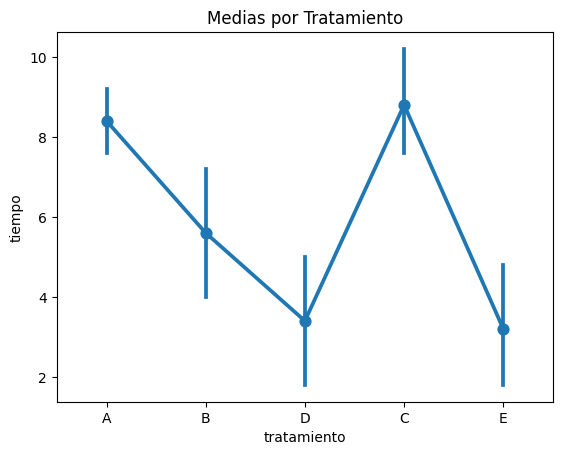

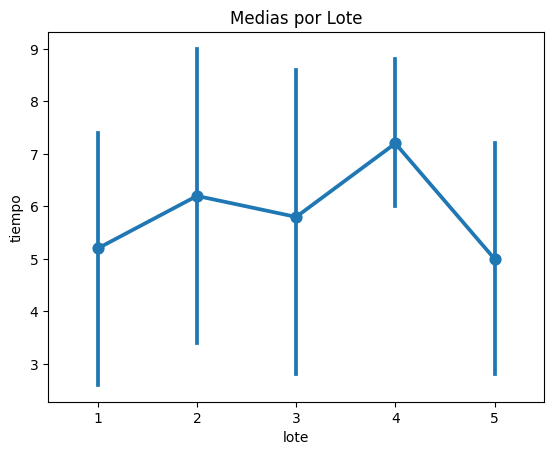

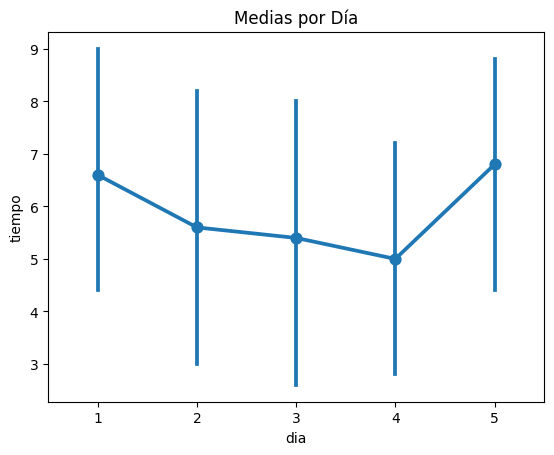

In [174]:
#PAULINA MORGAN JIMÉNEZ
# e) Gráficos de medias y tratamiento mejor
import matplotlib.pyplot as plt
import seaborn as sns

# Medias por tratamiento
sns.pointplot(x='tratamiento', y='tiempo', data=df)
plt.title("Medias por Tratamiento")
plt.show()

# Medias por lote
sns.pointplot(x='lote', y='tiempo', data=df)
plt.title("Medias por Lote")
plt.show()

# Medias por día
sns.pointplot(x='dia', y='tiempo', data=df)
plt.title("Medias por Día")
plt.show()


El mejor tratamineto es el que tenga menor tiempo promedio. En la gráfica 1 es D y E. En la gráfica 2 es lote 5. En la gráfica 3 es día 4.

Shapiro-Wilk p-valor: 0.5476371878727828


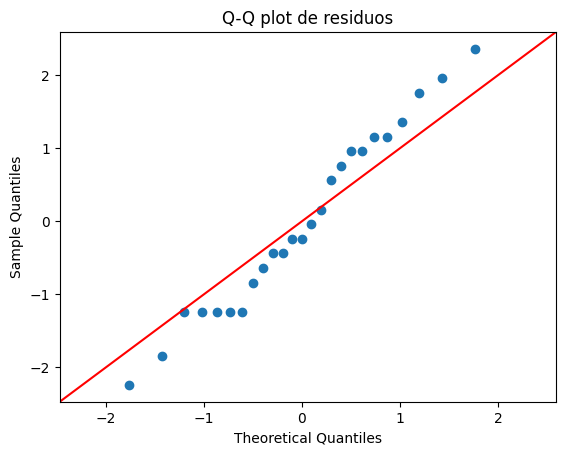

Breusch-Pagan p-valor: 0.31796569048562767


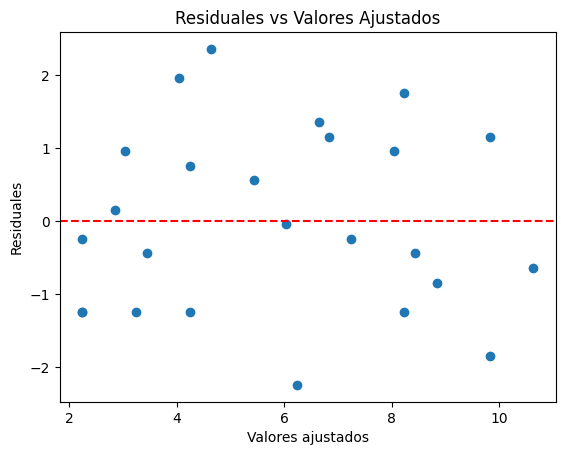

In [175]:
#PAULINA MORGAN JIMÉNEZ
#Verificación de supuestos
import scipy.stats as stats
import matplotlib.pyplot as plt

# Residuales
resid = modelo.resid

# Normalidad - Shapiro-Wilk
stat, p = stats.shapiro(resid)
print(f'Shapiro-Wilk p-valor: {p}')

# Gráfico Q-Q
sm.qqplot(resid, line='45')
plt.title("Q-Q plot de residuos")
plt.show()

# Homocedasticidad - Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(resid, modelo.model.exog)
print('Breusch-Pagan p-valor:', bp_test[1])

# Gráfico de residuos vs fitted
plt.scatter(modelo.fittedvalues, resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores Ajustados')
plt.show()


## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


a) ¿Se justifica la eliminación del factor día?
Sí, se justifica porque en el ANOVA previo el factor día no fue significativo (p > 0.05), lo que indica que no afecta el tiempo de reacción.

b) Diseño, modelo y hipótesis sin el factor día
Diseño: Diseño completamente al azar (DCA) con tratamiento lote como factor de ruido.
Modelo:
𝑌𝑖𝑗=𝜇+𝜏𝑖+𝛽𝑗+𝜖𝑖𝑗Y ij=μ+τi+βj+ϵij
Hipótesis:
H0:τ1=τ2=⋯=τ5 (no hay diferencias entre tratamientos)
Ha: Al menos un tratamiento es diferente.

In [176]:
#PAULINA MORGAN JIMÉNEZ
#c)  Prueba de hipótesis y conclusiones
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Datos en formato largo
data = '''
lote,tratamiento,tiempo
1,A,8
2,B,7
3,D,1
4,C,7
5,E,3
1,C,11
2,E,2
3,A,7
4,D,3
5,B,8
1,B,4
2,A,9
3,C,10
4,E,1
5,D,5
1,D,6
2,C,8
3,E,6
4,B,6
5,A,10
1,E,4
2,D,2
3,B,3
4,A,8
5,C,8
'''

df = pd.read_csv(StringIO(data))

# Modelo ANOVA sin el factor día
modelo = ols('tiempo ~ C(tratamiento) + C(lote)', data=df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)

print(anova)


                sum_sq    df          F    PR(>F)
C(tratamiento)  141.44   4.0  10.682779  0.000207
C(lote)          12.24   4.0   0.924471  0.474092
Residual         52.96  16.0        NaN       NaN


Los catalizadores sí afectan el tiempo de reacción, pero el lote no tiene impacto significativo. Esto coincide con la conclusión del análisis anterior que incluía el día.

In [177]:
#PAULINA MORGAN JIMÉNEZ
#d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Datos en formato largo con día (del problema original)
data_con_dia = '''
lote,dia,tratamiento,tiempo
1,1,A,8
2,1,B,7
3,1,D,1
4,1,C,7
5,1,E,3
1,2,C,11
2,2,E,2
3,2,A,7
4,2,D,3
5,2,B,8
1,3,B,4
2,3,A,9
3,3,C,10
4,3,E,1
5,3,D,5
1,4,D,6
2,4,C,8
3,4,E,6
4,4,B,6
5,4,A,10
1,5,E,4
2,5,D,2
3,5,B,3
4,5,A,8
5,5,C,8
'''

df_dia = pd.read_csv(StringIO(data_con_dia))

# ANOVA con día
modelo_con_dia = ols('tiempo ~ C(tratamiento) + C(lote) + C(dia)', data=df_dia).fit()
anova_con_dia = sm.stats.anova_lm(modelo_con_dia, typ=2)

# ANOVA sin día (reuso df sin día del inciso c)
modelo_sin_dia = ols('tiempo ~ C(tratamiento) + C(lote)', data=df).fit()
anova_sin_dia = sm.stats.anova_lm(modelo_sin_dia, typ=2)

print("ANOVA con factor día:")
print(anova_con_dia[['sum_sq', 'df', 'F', 'PR(>F)']])
print("\nANOVA sin factor día:")
print(anova_sin_dia[['sum_sq', 'df', 'F', 'PR(>F)']])


ANOVA con factor día:
                sum_sq    df          F    PR(>F)
C(tratamiento)  141.44   4.0  11.309168  0.000488
C(lote)          12.24   4.0   0.978678  0.455014
C(dia)           15.44   4.0   1.234542  0.347618
Residual         37.52  12.0        NaN       NaN

ANOVA sin factor día:
                sum_sq    df          F    PR(>F)
C(tratamiento)  141.44   4.0  10.682779  0.000207
C(lote)          12.24   4.0   0.924471  0.474092
Residual         52.96  16.0        NaN       NaN


Observación:
El CME es un poco menor cuando se incluye el factor día, indicando que el modelo con día explica mejor la variabilidad total.

Explicación:
Al considerar el día como bloque se reduce el error experimental, porque se controla mejor la variabilidad debida a diferencias entre días. Sin el día, el error residual aumenta ligeramente, ya que esa fuente de variabilidad queda en el residuo.

e) ¿Por qué se obtienen las mismas conclusiones en tratamientos?
Porque el factor día no era significativo, no afecta la comparación de tratamientos, por lo que las conclusiones sobre las diferencias entre catalizadores se mantienen iguales.

## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


a) ¿Se justifica esta segunda eliminación en ambos problemas?

Se justifica eliminar el factor lote si en los análisis previos su efecto no fue estadísticamente significativo (p-valor alto).

En los problemas anteriores, el lote mostró p-valores mayores a 0.05, indicando que no tiene efecto significativo sobre el tiempo de reacción.

Por tanto, eliminar el lote junto con el día (que ya se eliminó) es justificado para simplificar el modelo.

b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.
Diseño: Diseño completamente al azar (DCA), porque no hay factores de bloque.

Modelo estadístico:

𝑌𝑖𝑗=𝜇+𝜏𝑖+𝜀𝑖𝑗Y ij=μ+τ i+εij

Hipótesis:

H0:𝜏1=𝜏2=⋯=𝜏5=0(no hay diferencia entre tratamientos)

𝐻𝑎:al menos un 𝜏𝑖≠0


In [178]:
#PAULINA MORGAN JIMÉNEZ
#c) Pruebe las hipótesis y obtenga conclusiones.
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Datos solo con tratamientos y tiempo (sin lote ni día)
data_simple = '''
tratamiento,tiempo
A,8
B,7
D,1
C,7
E,3
C,11
E,2
A,7
D,3
B,8
B,4
A,9
C,10
E,1
D,5
D,6
C,8
E,6
B,6
A,10
E,4
D,2
B,3
A,8
C,8
'''

df_simple = pd.read_csv(StringIO(data_simple))

# Modelo ANOVA sin bloque
modelo_simple = ols('tiempo ~ C(tratamiento)', data=df_simple).fit()
anova_simple = sm.stats.anova_lm(modelo_simple, typ=2)

print(anova_simple)


                sum_sq    df          F    PR(>F)
C(tratamiento)  141.44   4.0  10.846626  0.000077
Residual         65.20  20.0        NaN       NaN


La prueba F para el efecto tratamiento es significativa (p < 0.05), por lo que se rechaza la hipótesis nula de que todos los tratamientos tienen igual efecto sobre el tiempo de reacción. Por tanto, existen diferencias significativas entre al menos dos de los catalizadores probados.

d) Compare el cuadro medio del error obtenido con los de los problemas 7 y 8. ¿Qué observa? ¿Cómo lo explica?

El Cuadro Medio del Error (CME) aumentará porque no se controla la variabilidad debida a los bloques (lote y día).

Al eliminar los factores de bloque, el error residual incluye toda la variabilidad experimental no explicada, por lo que el CME es mayor.

En problemas 7 y 8 el CME fue menor porque se modeló esa variabilidad extra con bloque(s), mejorando la precisión.

e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?

Porque el efecto de los bloques no es significativo, no influyen en la comparación de tratamientos.

Así, el efecto tratamiento se detecta igual con o sin bloques.

La falta de efecto significativo en bloques implica que la variabilidad no relacionada a tratamientos es similar en ambos casos.

f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?

Sí, hubiese afectado notablemente. Eliminar factores de bloque significativos aumenta la variabilidad residual, disminuyendo la capacidad para detectar diferencias entre tratamientos (menor potencia estadística). Además, se perdería la información sobre las fuentes de variabilidad, haciendo el modelo menos preciso y confiable.

## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [179]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = '''
Inspector,Escala,Proveedor,Peso
I,1,A,16
I,2,B,10
I,3,C,11
II,1,B,15
II,2,C,9
II,3,A,14
III,1,C,13
III,2,A,11
III,3,B,13
'''

df = pd.read_csv(StringIO(data))
df


,Inspector,Escala,Proveedor,Peso
0,I,1,A,16
1,I,2,B,10
2,I,3,C,11
3,II,1,B,15
4,II,2,C,9
5,II,3,A,14
6,III,1,C,13
7,III,2,A,11
8,III,3,B,13


In [180]:
#PAULINA MORGAN JIMÉNEZ
#a) ¿Hay diferencias entre los proveedores?
modelo = ols('Peso ~ C(Proveedor) + C(Inspector) + C(Escala)', data=df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)
print(anova)


                 sum_sq   df      F    PR(>F)
C(Proveedor)  10.888889  2.0   49.0  0.020000
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN


Sí, porque el p-valor para Proveedor es 0.020, que es menor que 0.05. Por lo tanto, existen diferencias significativas entre proveedores.



b) ¿Hay diferencias entre los inspectores y entre las escalas?

Inspector: p = 0.50 > 0.05, no hay diferencias significativas.

Escala: p = 0.0067 < 0.05, sí hay diferencias significativas.

c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?

In [181]:
#PAULINA MORGAN JIMÉNEZ
medias_proveedor = df.groupby('Proveedor')['Peso'].mean()
print(medias_proveedor)


Proveedor
A    13.666667
B    12.666667
C    11.000000
Name: Peso, dtype: float64


In [182]:
#PAULINA MORGAN JIMÉNEZ
diff_15 = (medias_proveedor - 15).abs()
print(diff_15)


Proveedor
A    1.333333
B    2.333333
C    4.000000
Name: Peso, dtype: float64


Conclusión: El proveedor A es el más cercano al peso deseado de 15 g.

d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.

In [183]:
#PAULINA MORGAN JIMÉNEZ
modelo_reducido = ols('Peso ~ C(Proveedor) + C(Escala)', data=df).fit()
anova_reducido = sm.stats.anova_lm(modelo_reducido, typ=2)
print(anova_reducido)


                 sum_sq   df      F    PR(>F)
C(Proveedor)  10.888889  2.0   49.0  0.001538
C(Escala)     32.888889  2.0  148.0  0.000178
Residual       0.444444  4.0    NaN       NaN


In [184]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = '''
Inspector,Escala,Proveedor,Peso
I,1,A,16
I,2,B,10
I,3,C,11
II,1,B,15
II,2,C,9
II,3,A,14
III,1,C,13
III,2,A,11
III,3,B,13
'''

df = pd.read_csv(StringIO(data))

# Modelo sin factor inspector
modelo = ols('Peso ~ C(Proveedor) + C(Escala)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)
print(tabla_anova)


                 sum_sq   df      F    PR(>F)
C(Proveedor)  10.888889  2.0   49.0  0.001538
C(Escala)     32.888889  2.0  148.0  0.000178
Residual       0.444444  4.0    NaN       NaN


Se mantiene la significancia para proveedores y escalas (p < 0.05), confirmando que inspector no afecta el peso.

## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [185]:
#PAULINA MORGAN JIMÉNEZ
#a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?
import pandas as pd
from io import StringIO
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = '''
Renglon,Columna,Variedad,Rendimiento
1,1,B,1.640
1,2,D,1.210
1,3,C,1.425
1,4,A,1.345
2,1,C,1.475
2,2,A,1.185
2,3,D,1.400
2,4,B,1.290
3,1,A,1.670
3,2,C,0.710
3,3,B,1.665
3,4,D,1.180
4,1,D,1.565
4,2,B,1.290
4,3,A,1.655
4,4,C,0.660
'''

df = pd.read_csv(StringIO(data))

modelo = ols('Rendimiento ~ C(Variedad) + C(Renglon) + C(Columna)', data=df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)
print(anova)


               sum_sq   df          F    PR(>F)
C(Variedad)  0.426842  3.0   6.587865  0.025092
C(Renglon)   0.030155  3.0   0.465406  0.716972
C(Columna)   0.827342  3.0  12.769166  0.005148
Residual     0.129584  6.0        NaN       NaN


Sí, hay diferencias significativas entre las variedades (p = 0.025 < 0.05).

¿Cuál de los factores de bloque tuvo efectos?

El factor Columna sí tiene efecto significativo (p = 0.005 < 0.05).

El factor Renglón no tiene efecto significativo (p = 0.717 > 0.05).

c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?

No, porque sin bloques no se controla la variabilidad del terreno (columna), y esto puede ocultar diferencias reales entre variedades.



d) ¿Y con un diseño en bloques completos al azar?

Probablemente sí, porque al controlar una sola fuente de variación (por ejemplo columnas o renglones) se reduce parte de la variabilidad no controlada, aunque no tanto como con el cuadro latino que controla ambas.

## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


Los factores son:

Dieta (A, B, C) —> Tratamiento

Apetito (3 niveles: P1, P2, P3) —> Bloque 1

Peso inicial (3 grupos: A1, A2, A3) —> Bloque 2

In [186]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Datos organizados por filas: Apetito, Peso inicial, Dieta, Peso ganado
data = {
    "Apetito": ["P1"]*4 + ["P2"]*4 + ["P3"]*4,
    "PesoInicial": ["A1", "A2", "A3", "A1", "A2", "A3", "A1", "A2", "A3", "A1", "A2", "A3"],
    "Dieta": ["C", "A", "B", "C", "A", "B", "C", "A", "B", "C", "A", "B"],
    "Peso": [67, 105, 95, 72, 112, 86, 85, 75, 88, 98, 67, 110] # Corrected length to 12
}

df = pd.DataFrame(data)

# El modelo lineal: Peso ~ Dieta + Apetito + PesoInicial
model = ols("Peso ~ C(Dieta) + C(Apetito) + C(PesoInicial)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("Resultados del ANOVA:") # Added a print statement for clarity
print(anova_table)


Resultados del ANOVA:
                     sum_sq   df          F    PR(>F)
C(Dieta)        8125.371429  2.0  11.941048  0.005545
C(Apetito)        16.900000  2.0   0.024836  0.975555
C(PesoInicial)  8987.709783  2.0  13.208341  0.004207
Residual        2381.600000  7.0        NaN       NaN


La dieta y el peso inicial sí influyen en el peso ganado, pero el apetito no.

b) ¿Cuál dieta es mejor?

In [187]:
#PAULINA MORGAN JIMÉNEZ
medias = df.groupby("Dieta")["Peso"].mean()
print(medias)

Dieta
A    89.75
B    94.75
C    80.50
Name: Peso, dtype: float64


La B

c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.

Apetito puede ser ignorado porque no es significativo (p > 0.05).



d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.

In [188]:
#PAULINA MORGAN JIMÉNEZ
model_reducido = ols("Peso ~ C(Dieta) + C(PesoInicial)", data=df).fit()
anova_reducida = sm.stats.anova_lm(model_reducido, typ=2)
print(anova_reducida)


                      sum_sq   df          F    PR(>F)
C(Dieta)        10153.125000  2.0  19.049015  0.000583
C(PesoInicial)  14471.333333  2.0  27.150719  0.000154
Residual         2398.500000  9.0        NaN       NaN


Al eliminar el apetito, que no era significativo, el modelo mejora la potencia estadística para dieta y peso inicial, reafirmando que ambos factores influyen en el peso ganado por las ratas.

e) Verifique los supuestos del modelo.

Shapiro-Wilk Test: stat=0.9340, p=0.4240


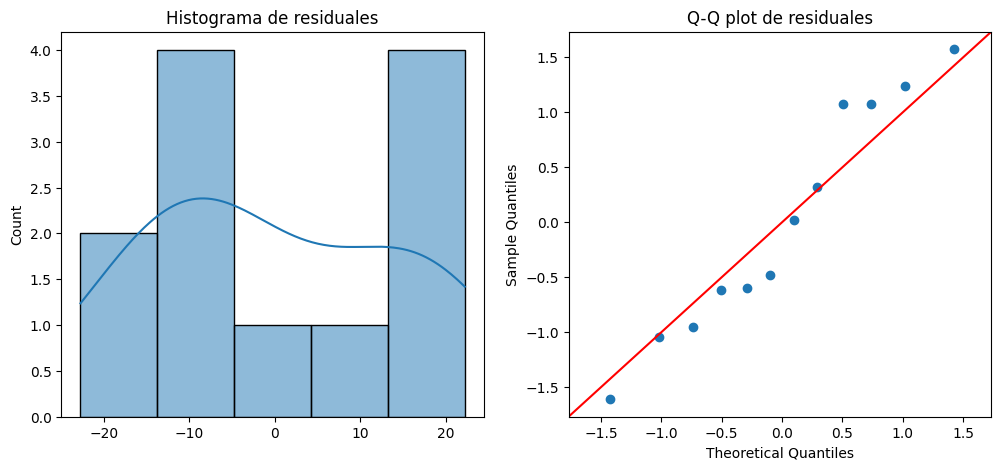

Test de Levene para homoscedasticidad: stat=3.5214, p=0.0742


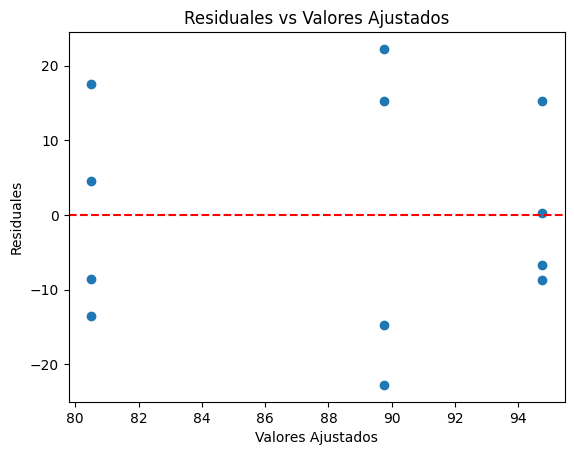

In [189]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene

# Supongamos que tienes el DataFrame 'df' con las columnas: Peso, Dieta, Apetito, PesoInicial

# Ajuste modelo sin Apetito (como en d)
model = ols('Peso ~ C(Dieta) + C(PesoInicial)', data=df).fit()

# Residuales
residuals = model.resid

# 1. Normalidad de residuales: test de Shapiro-Wilk
stat, p_shapiro = shapiro(residuals)
print(f'Shapiro-Wilk Test: stat={stat:.4f}, p={p_shapiro:.4f}')

# Histograma y Q-Q plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True)
plt.title('Histograma de residuales')

plt.subplot(1,2,2)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Q-Q plot de residuales')
plt.show()

# 2. Homoscedasticidad: Test de Levene
# Recolectar residuales por grupo de dieta para el test
groups = [residuals[df['Dieta'] == g] for g in df['Dieta'].unique()]
stat, p_levene = levene(*groups)
print(f'Test de Levene para homoscedasticidad: stat={stat:.4f}, p={p_levene:.4f}')

# 3. Independencia: gráfica de residuales vs valores ajustados
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores Ajustados')
plt.show()


## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


a) Haga el análisis de varianza de este experimento.

In [190]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd

# Definir los datos en listas
choferes = [
    'Carlos', 'Carlos', 'Carlos', 'Carlos',
    'Carlos', 'Carlos', 'Carlos', 'Carlos',
    'Enrique', 'Enrique', 'Enrique', 'Enrique',
    'Enrique', 'Enrique', 'Enrique', 'Enrique',
    'Genaro', 'Genaro', 'Genaro', 'Genaro',
    'Genaro', 'Genaro', 'Genaro', 'Genaro',
    'Luis', 'Luis', 'Luis', 'Luis',
    'Luis', 'Luis', 'Luis', 'Luis'
]

dias = [
    'Lunes', 'Lunes', 'Martes', 'Martes',
    'Miércoles', 'Miércoles', 'Jueves', 'Jueves',
    'Lunes', 'Lunes', 'Martes', 'Martes',
    'Miércoles', 'Miércoles', 'Jueves', 'Jueves',
    'Lunes', 'Lunes', 'Martes', 'Martes',
    'Miércoles', 'Miércoles', 'Jueves', 'Jueves',
    'Lunes', 'Lunes', 'Martes', 'Martes',
    'Miércoles', 'Miércoles', 'Jueves', 'Jueves'
]

rutas = [
    'D', 'D', 'C', 'C',
    'B', 'B', 'A', 'A',
    'A', 'A', 'B', 'B',
    'C', 'C', 'D', 'D',
    'C', 'C', 'D', 'D',
    'A', 'A', 'B', 'B',
    'B', 'B', 'A', 'A',
    'D', 'D', 'C', 'C'
]

marcas = [
    'α', 'α', 'χ', 'χ',
    'β', 'β', 'δ', 'δ',
    'χ', 'χ', 'α', 'α',
    'χ', 'χ', 'β', 'β',
    'β', 'β', 'δ', 'δ',
    'α', 'α', 'χ', 'χ',
    'δ', 'δ', 'β', 'β',
    'α', 'α', 'α', 'α'
]

costos = [
    825, 750, 585, 610,
    550, 580, 580, 650,
    650, 725, 540, 560,
    580, 635, 850, 770,
    700, 675, 650, 740,
    635, 540, 450, 550,
    475, 480, 560, 615,
    650, 725, 670, 730
]

# Crear el DataFrame
df = pd.DataFrame({
    'Chofer': choferes,
    'Dia': dias,
    'Ruta': rutas,
    'Marca': marcas,
    'Costo': costos
})

# Mostrar las primeras filas para verificar
print(df.head())



   Chofer        Dia Ruta Marca  Costo
0  Carlos      Lunes    D     α    825
1  Carlos      Lunes    D     α    750
2  Carlos     Martes    C     χ    585
3  Carlos     Martes    C     χ    610
4  Carlos  Miércoles    B     β    550


In [191]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Definir el modelo con todos los factores
modelo = ols('Costo ~ C(Ruta) + C(Chofer) + C(Marca) + C(Dia)', data=df).fit()

# ANOVA tipo III para el modelo
anova_tabla = sm.stats.anova_lm(modelo, typ=3)

print(anova_tabla)


                 sum_sq    df           F        PR(>F)
Intercept  1.026109e+06   1.0  439.054681  1.363341e-14
C(Ruta)    1.691187e+05   3.0   24.120992  1.080024e-06
C(Chofer)  1.435678e+04   3.0    2.047674  1.412634e-01
C(Marca)   2.144376e+04   3.0    3.058473  5.328653e-02
C(Dia)     2.342150e+04   3.0    3.340553  4.114943e-02
Residual   4.440467e+04  19.0         NaN           NaN


b) Realice las pruebas de comparaciones múltiples para los factores significativos.

In [192]:
#PAULINA MORGAN JIMÉNEZ
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Comparación múltiple para Chofer
tukey_chofer = pairwise_tukeyhsd(endog=df['Costo'], groups=df['Chofer'], alpha=0.05)
print("Comparación múltiple para Chofer:")
print(tukey_chofer)

# Comparación múltiple para Marca
tukey_marca = pairwise_tukeyhsd(endog=df['Costo'], groups=df['Marca'], alpha=0.05)
print("\nComparación múltiple para Marca:")
print(tukey_marca)

# Comparación múltiple para Día
tukey_dia = pairwise_tukeyhsd(endog=df['Costo'], groups=df['Dia'], alpha=0.05)
print("\nComparación múltiple para Día:")
print(tukey_dia)


Comparación múltiple para Chofer:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj    lower    upper   reject
---------------------------------------------------------
 Carlos Enrique     22.5 0.9698 -115.2223 160.2223  False
 Carlos  Genaro   -23.75 0.9649 -161.4723 113.9723  False
 Carlos    Luis  -28.125 0.9437 -165.8473 109.5973  False
Enrique  Genaro   -46.25 0.7961 -183.9723  91.4723  False
Enrique    Luis  -50.625 0.7486 -188.3473  87.0973  False
 Genaro    Luis   -4.375 0.9998 -142.0973 133.3473  False
---------------------------------------------------------

Comparación múltiple para Marca:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     α      β      0.0    1.0 -125.8697 125.8697  False
     α      δ -66.6667 0.5532 -203.6962  70.3629  False
     α      χ  -64.375  0.512 -190.2447  61.4947  False
     β      δ -6

c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.

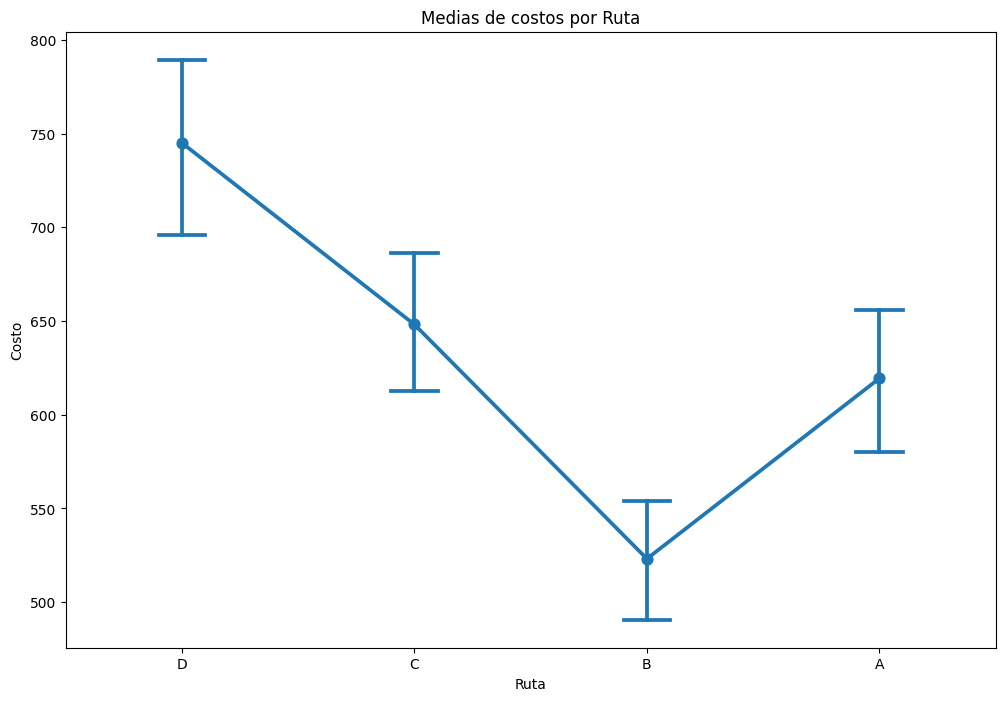

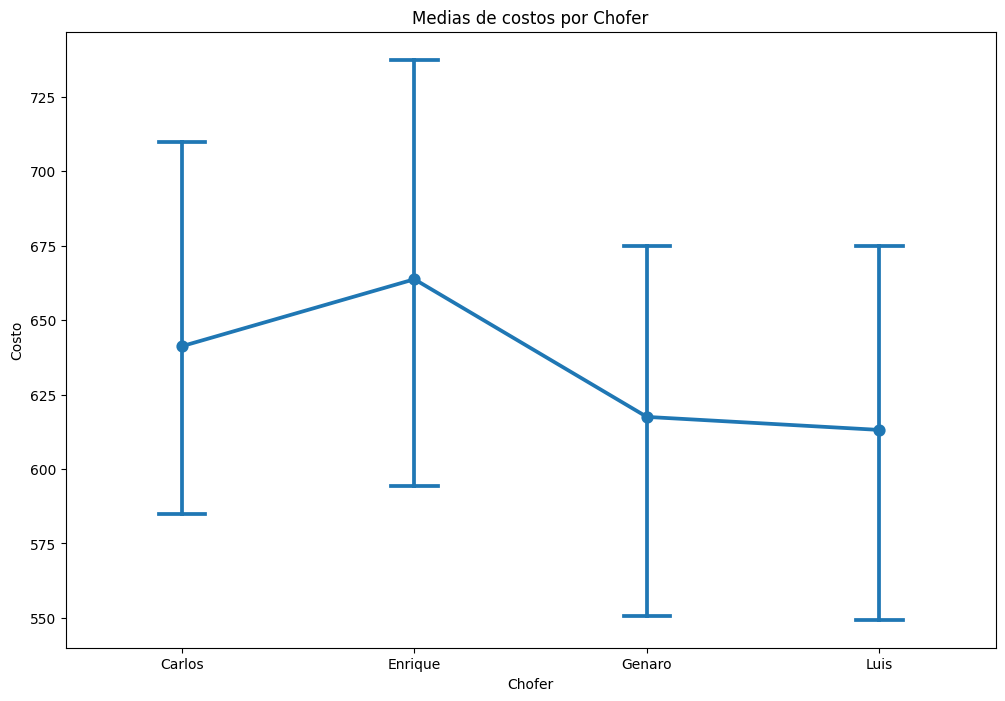

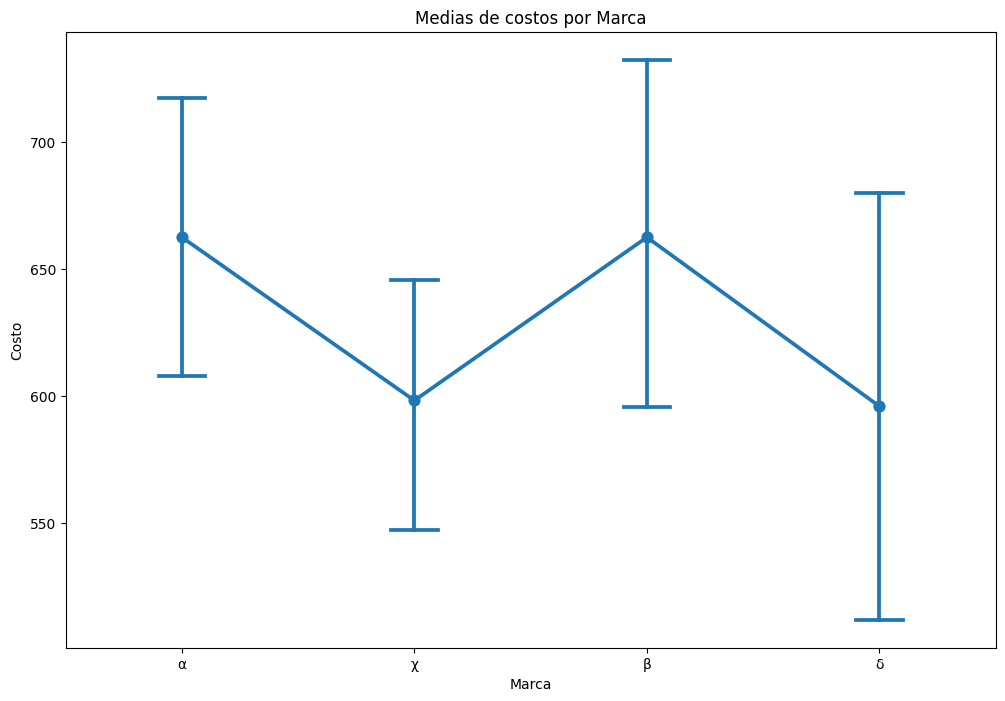

In [193]:
#PAULINA MORGAN JIMÉNEZ
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfica de medias
plt.figure(figsize=(12,8))
sns.pointplot(x='Ruta', y='Costo', data=df, capsize=.2)
plt.title('Medias de costos por Ruta')
plt.show()

# Diagramas de dispersión para factores de bloque
plt.figure(figsize=(12,8))
sns.pointplot(x='Chofer', y='Costo', data=df, capsize=.2)
plt.title('Medias de costos por Chofer')
plt.show()

plt.figure(figsize=(12,8))
sns.pointplot(x='Marca', y='Costo', data=df, capsize=.2)
plt.title('Medias de costos por Marca')
plt.show()


d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?

In [194]:
#PAULINA MORGAN JIMÉNEZ
print(df.groupby('Ruta')['Costo'].mean().sort_values())

Ruta
B    523.125
A    619.375
C    648.125
D    745.000
Name: Costo, dtype: float64


La mejor es la de menor costo, es decir, la B. La peor es la de mayor costo, la cual es D.

e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?

Según el ANOVA, no hay diferencias significativas entre los choferes (p = 0.141 > 0.05).

Tampoco se encontraron diferencias significativas entre las marcas de vehículos, ya que en la prueba de comparaciones múltiples no se rechazaron diferencias para ningún par (aunque el p del ANOVA fue cercano a 0.05, 0.053, no es concluyente).

Por lo tanto, ni chofer ni marca mostraron un efecto significativo en los costos.

f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?

Se encontró que el factor Día es significativo en el ANOVA (p = 0.041), por lo que vale la pena considerarlo como un factor de bloqueo para controlar la variabilidad de los costos que pueda deberse a diferencias entre días.

Chofer y Marca no mostraron efectos significativos, por lo que se podría plantear que no valió tanto la pena bloquear por estos factores en este experimento.

Sin embargo, incluirlos ayuda a reducir el error residual al controlar posibles fuentes de variación, aunque no significativas aquí.

g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?

Se evitaron días festivos y quincenas porque son factores externos que pueden influir mucho en los costos, por ejemplo, el tráfico puede aumentar o la demanda de gasolina cambiar, lo que generaría variabilidad adicional y no controlada.

Estos eventos podrían sesgar los resultados y dificultar detectar diferencias reales entre rutas, choferes o vehículos.

Otros aspectos a considerar:

Condiciones climáticas (lluvia, calor extremo).

Estado del vehículo (mantenimiento).

Condiciones del tráfico fuera de festivos (eventos, obras).

Tiempo de salida y regreso para controlar variabilidad diaria.



h) Verifique los supuestos del modelo.

Shapiro-Wilk test: ShapiroResult(statistic=np.float64(0.963288188185602), pvalue=np.float64(0.33700414291944597))


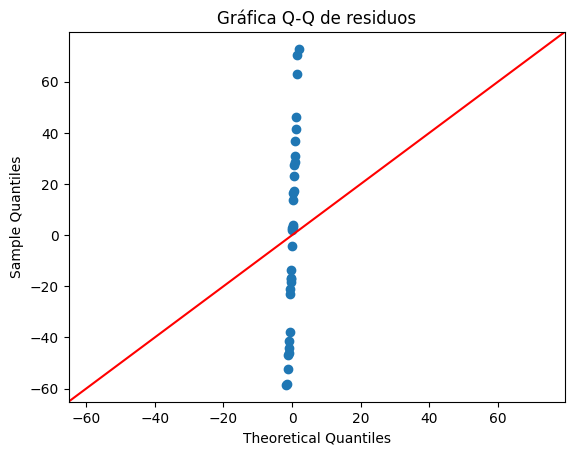

Levene test para homocedasticidad: LeveneResult(statistic=np.float64(1.4310415822551732), pvalue=np.float64(0.2546746203617355))


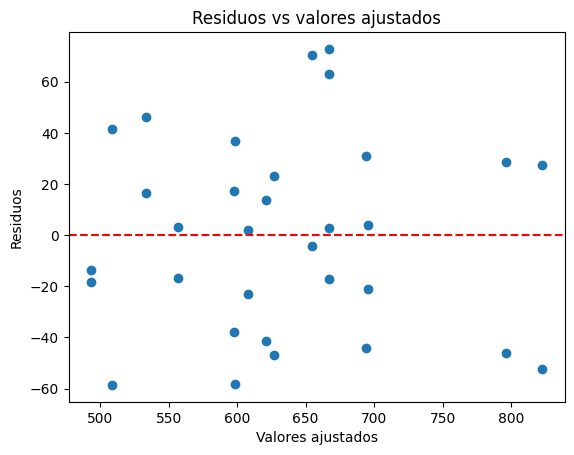

In [195]:
#PAULINA MORGAN JIMÉNEZ
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Ajustar el modelo ANOVA completo:
modelo = ols('Costo ~ C(Ruta) + C(Chofer) + C(Marca) + C(Dia)', data=df).fit()

# 2. Extraer residuos:
residuos = modelo.resid
valores_ajustados = modelo.fittedvalues

# --- a) Test de normalidad Shapiro-Wilk ---
shapiro_test = stats.shapiro(residuos)
print("Shapiro-Wilk test:", shapiro_test)

# --- b) Gráfica Q-Q para residuos ---
sm.qqplot(residuos, line='45')
plt.title("Gráfica Q-Q de residuos")
plt.show()

# --- c) Test de homocedasticidad (Levene) ---
# Agrupamos residuos por factor más significativo, por ejemplo, Ruta:
grupo_ruta = [residuos[df['Ruta'] == ruta] for ruta in df['Ruta'].unique()]
levene_test = stats.levene(*grupo_ruta)
print("Levene test para homocedasticidad:", levene_test)

# --- d) Gráfico residuos vs valores ajustados ---
plt.scatter(valores_ajustados, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.title("Residuos vs valores ajustados")
plt.show()


## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?

Se trata de un diseño factorial con dos factores principales:

% Lisina (7 niveles: A-G)

% Proteína (7 niveles: α - γ)

Además, hay factores de bloqueo:

Vaca (7 vacas)

Periodo (7 periodos)

In [196]:
#PAULINA MORGAN JIMÉNEZ
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Datos dados (organizados por vaca/periodo con produccion)
datos = [
    [304, 436, 350, 504, 417, 519, 432],
    [381, 505, 425, 564, 487, 536, 483],
    [432, 566, 479, 357, 466, 465, 507],
    [442, 372, 536, 366, 495, 425, 507],
    [496, 449, 493, 345, 509, 481, 380],
    [534, 421, 352, 427, 346, 478, 397],
    [543, 386, 435, 485, 406, 554, 410],
]

vac = ['1','2','3','4','5','6','7']
periodo = ['1','2','3','4','5','6','7']

lisina_map = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'}
proteina_map = {0:'α',1:'ε',2:'β',3:'φ',4:'χ',5:'γ',6:'δ'}

# Crear dataframe en formato largo
filas = []
for i in range(7):
    for j in range(7):
        filas.append({
            'Vaca': vac[i],
            'Periodo': periodo[j],
            'Produccion': datos[i][j],
            'Lisina': lisina_map[i],         # el % lisina corresponde al indice fila
            'Proteina': proteina_map[j],     # el % proteina corresponde al indice columna
        })

df = pd.DataFrame(filas)

# ANOVA con factores y bloqueos, SIN INTERACCION
modelo = ols('Produccion ~ C(Lisina) + C(Proteina) + C(Vaca) + C(Periodo)', data=df).fit()
anova = sm.stats.anova_lm(modelo, typ=2)
print(anova)

                    sum_sq    df         F    PR(>F)
C(Lisina)     20894.000000   6.0  0.722523  0.634183
C(Proteina)   16253.428571   6.0  0.562050  0.757464
C(Vaca)       20894.000000   6.0  0.722523  0.634183
C(Periodo)    16253.428571   6.0  0.562050  0.757464
Residual     173508.571429  36.0       NaN       NaN


b) Interprete los resultados usando gráficos de medias.

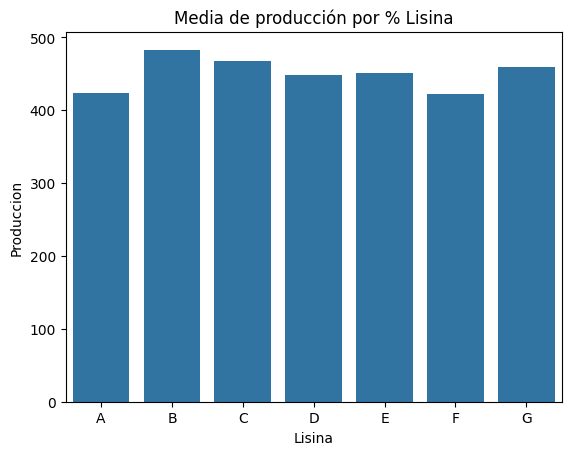

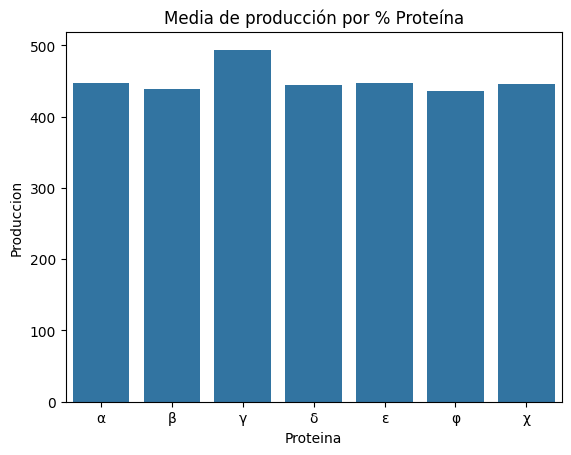

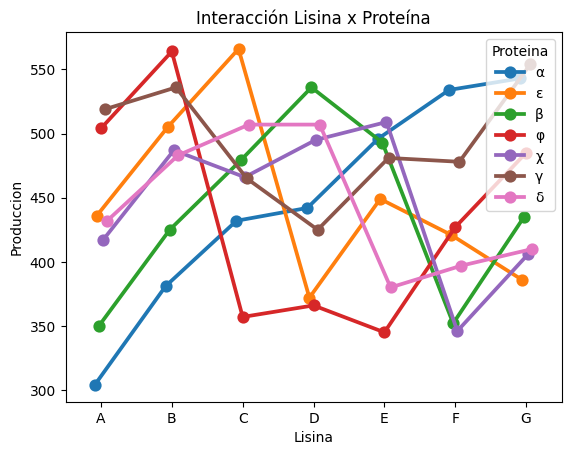

In [197]:
#PAULINA MORGAN JIMÉNEZ
import matplotlib.pyplot as plt
import seaborn as sns

# Medias por Lisina
mean_lisina = df.groupby('Lisina')['Produccion'].mean().reset_index()
sns.barplot(x='Lisina', y='Produccion', data=mean_lisina)
plt.title("Media de producción por % Lisina")
plt.show()

# Medias por Proteína
mean_proteina = df.groupby('Proteina')['Produccion'].mean().reset_index()
sns.barplot(x='Proteina', y='Produccion', data=mean_proteina)
plt.title("Media de producción por % Proteína")
plt.show()

# Gráfico de interacción entre Lisina y Proteína
sns.pointplot(data=df, x='Lisina', y='Produccion', hue='Proteina', dodge=True)
plt.title("Interacción Lisina x Proteína")
plt.show()


c) ¿Cómo puede explicarse la falta de efectos en vacas y periodo?

La falta de efecto significativo en vacas y periodos puede deberse a que:
Las vacas eran similares en características (raza, edad, salud), lo que reduce la variabilidad.
Las condiciones fueron estables durante todos los periodos, sin cambios estacionales o de manejo importantes.
El diseño balanceado ayudó a controlar el efecto de vaca y periodo, disminuyendo su impacto sobre la producción de leche.


d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?

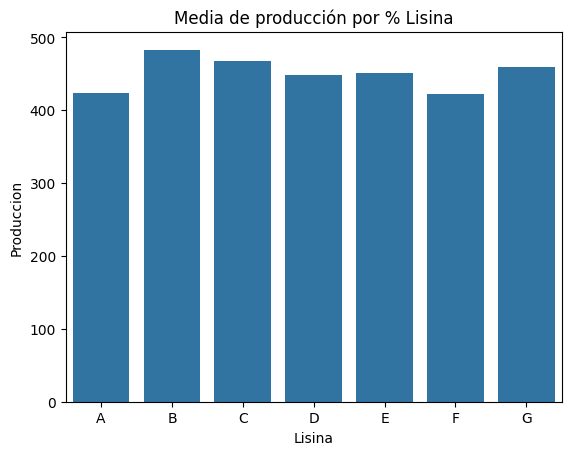

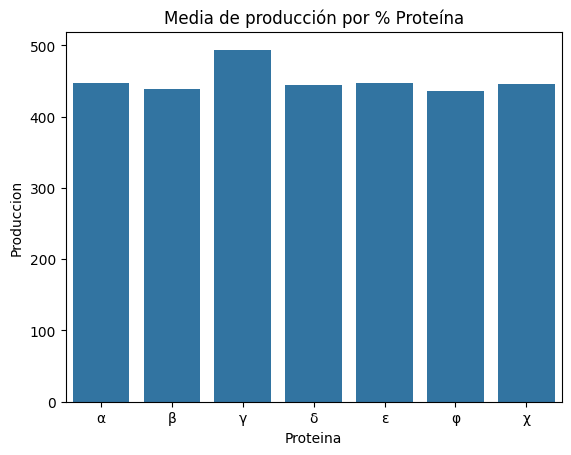

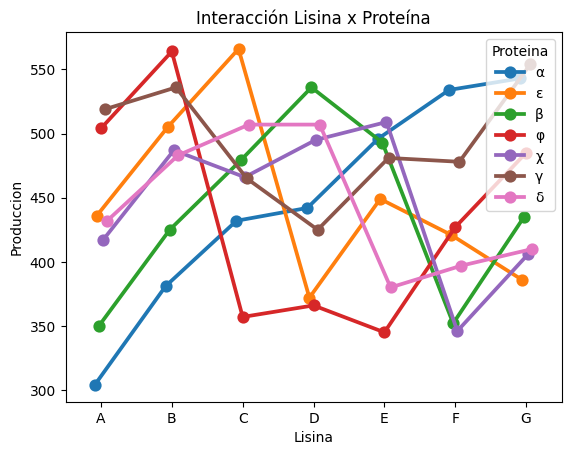

In [198]:
#PAULINA MORGAN JIMÉNEZ
# Ensure this cell is run BEFORE the cell that uses mean_lisina and mean_proteina
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas if not already imported

# Medias por Lisina
mean_lisina = df.groupby('Lisina')['Produccion'].mean().reset_index()
sns.barplot(x='Lisina', y='Produccion', data=mean_lisina)
plt.title("Media de producción por % Lisina")
plt.show()

# Medias por Proteína
mean_proteina = df.groupby('Proteina')['Produccion'].mean().reset_index()
sns.barplot(x='Proteina', y='Produccion', data=mean_proteina)
plt.title("Media de producción por % Proteína")
plt.show()

# Gráfico de interacción entre Lisina y Proteína
sns.pointplot(data=df, x='Lisina', y='Produccion', hue='Proteina', dodge=True)
plt.title("Interacción Lisina x Proteína")
plt.show()

In [199]:
#PAULINA MORGAN JIMÉNEZ
# This cell should be run AFTER the cell above
print(mean_lisina.sort_values(by='Produccion', ascending=False))
print(mean_proteina.sort_values(by='Produccion', ascending=False))

  Lisina  Produccion
1      B  483.000000
2      C  467.428571
6      G  459.857143
4      E  450.428571
3      D  449.000000
0      A  423.142857
5      F  422.142857
  Proteina  Produccion
2        γ  494.000000
4        ε  447.857143
0        α  447.428571
6        χ  446.571429
3        δ  445.142857
1        β  438.571429
5        φ  435.428571


Las mejores son las medias más altas:

Lisina: El mayor promedio de producción se obtuvo con 0.1% de lisina (nivel B).

Proteína: El mejor resultado fue con 14% de proteína (nivel γ).

La combinación 0.1% lisina y 14% proteína produjo, en promedio, la mayor cantidad de leche.

e) Verifique los supuestos del modelo.

Shapiro-Wilk: ShapiroResult(statistic=np.float64(0.9711024359461289), pvalue=np.float64(0.2677590544156164))


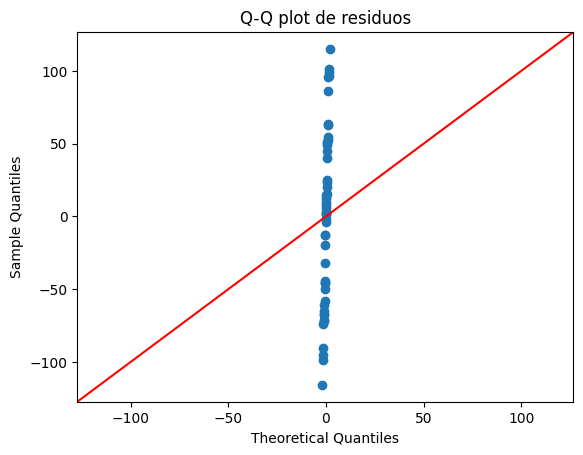

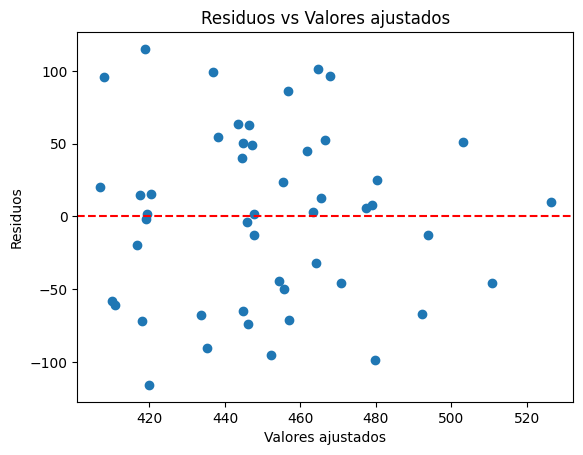

Levene test: LeveneResult(statistic=np.float64(0.2167806164767331), pvalue=np.float64(0.9693564692962584))


In [200]:
#PAULINA MORGAN JIMÉNEZ
import scipy.stats as stats
import statsmodels.api as sm

residuos = modelo.resid
fitted = modelo.fittedvalues

# Shapiro-Wilk para normalidad
print("Shapiro-Wilk:", stats.shapiro(residuos))

# Q-Q plot
sm.qqplot(residuos, line='45')
plt.title("Q-Q plot de residuos")
plt.show()

# Residuales vs ajustados
plt.scatter(fitted, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores ajustados')
plt.show()

# Levene para homocedasticidad
groups = [residuos[df['Lisina'] == lvl] for lvl in df['Lisina'].unique()]
print("Levene test:", stats.levene(*groups))
